### Introduction of Dataset:
#### Data: Data for Admission in the University: Data required to take admission in the university for 
####       higher studies
#### Source: Open source dataset
#### URL   : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

### Dataset Conntent:
##### Size = 400
##### GRE Scores ( out of 340 )
##### TOEFL Scores ( out of 120 )
##### University Rating ( out of 5 )
##### Statement of Purpose (SOP) ( out of 5 )
##### Letter of Recommendation (LOR) Strength ( out of 5 )
##### Undergraduate GPA ( out of 10 )
##### Research Experience ( either 0 or 1 )
##### Chance of Admit ( ranging from 0 to 1 ).

# Note:
## Since priroty of being selecetd is needed to investigate, new column 'Priority_Admit' was created by using the values in 'Chance of Admit' column.  'Priority_Admit' has 4 levels as '1st_Priority', '2nd_Priority', '3rd_Priority', '4th Priority' which were created based on the values in 'Chance of Admit' column

### Load Required Libraries

In [1535]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
#!pip install scikit-learn


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

#Explaining Models
#!pip install lime
import lime 
from lime import lime_tabular

### Read CSV file from a given path

In [1572]:
# From URL (GitHub raw file link)
file_path_url = 'https://raw.githubusercontent.com/MPDhanushika/DialogMachineLearningProject/main/adm_data.csv?token=GHSAT0AAAAAAB3PPDJSO4ZNYMGVE2LHPHRAY4ALFYQ'
#file_path_url = 'E:/Dialog ML class work/Datasets/adm_data.csv'

# Load CSV File
original_data = pd.read_csv(file_path_url)

# Since I need to keep original dataset as it is
temp_data = original_data.copy()


In [1573]:
# Checking null values
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


#### No any missing values in the dataset
####---------------------------------------

# 1. Data Preprocessing

## Test Code for Removing rows with any missing value

In [1428]:
original_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [940]:
# In general, if there is an missing value, delete the record and print a message

# I added a missing value to my dataframe (since original dataframe is free of missing values to check below function

df_new = original_data.copy()
df_new['SOP'][2] = np.nan
df_new['LOR '][3] = np.nan

if df_new.isnull().values.any():
    print(f"Incomplete Application. Missing values in {df_new.columns[df_new.isnull().any()].tolist()}")
    df_new.dropna(how ='any', axis =0, inplace = True)
# checking
#df_new.info()
df_new.head(10)


Incomplete Application. Missing values in ['SOP', 'LOR ']


C:\Users\acer\AppData\Local\Temp\ipykernel_1700\43216890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['SOP'][2] = np.nan
C:\Users\acer\AppData\Local\Temp\ipykernel_1700\43216890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LOR '][3] = np.nan


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45
10,11,325,106,3,3.5,4.0,8.40,1,0.52
11,12,327,111,4,4.0,4.5,9.00,1,0.84


### 1.5.1 Univariate Data Analysis

In [300]:
# Descriptive Statistics
df.describe(include ='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,400.0,NaN,NaN,NaN,200.5,115.614301,1.0,100.75,200.5,300.25,400.0
GRE_Score,400.0,NaN,NaN,NaN,316.8075,11.473646,290.0,308.0,317.0,325.0,340.0
TOEFL_Score,400.0,NaN,NaN,NaN,107.41,6.069514,92.0,103.0,107.0,112.0,120.0
University_Rating,400.0,NaN,NaN,NaN,3.0875,1.143728,1.0,2.0,3.0,4.0,5.0
SOP,400.0,NaN,NaN,NaN,3.4,1.006868,1.0,2.5,3.5,4.0,5.0
LOR,400.0,NaN,NaN,NaN,3.4525,0.898478,1.0,3.0,3.5,4.0,5.0
CGPA,400.0,NaN,NaN,NaN,8.598925,0.596317,6.8,8.17,8.61,9.0625,9.92
Research,400.0,2.0,1.0,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance_of_Admit,400.0,NaN,NaN,NaN,0.72435,0.142609,0.34,0.64,0.73,0.83,0.97
Priority_Admit_Range,400,4,"(0.339, 0.64]",113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Composition in Priority Groups'}, ylabel='Priority_Admit'>

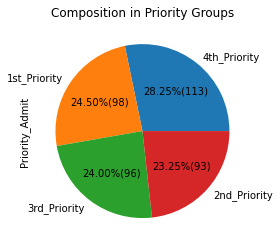

In [253]:
# Pie chart for categorical variable
count_priority=df['Priority_Admit'].value_counts()
df['Priority_Admit'].value_counts().plot(kind='pie',title='Composition in Priority Groups',autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*count_priority.sum()))



<AxesSubplot:title={'center':'Research Experience vs No Research Experience'}, ylabel='Research'>

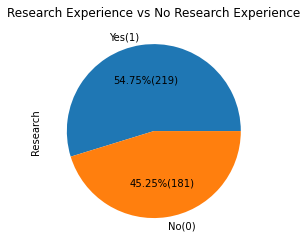

In [198]:
# Pie chart for categorical variable
count_Research=df['Research'].value_counts()
df['Research'].value_counts().plot(kind='pie',labels = ['Yes(1)','No(0)'],title='Research Experience vs No Research Experience',autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*count_Research.sum()))

#Check point
#df['Research'].value_counts()

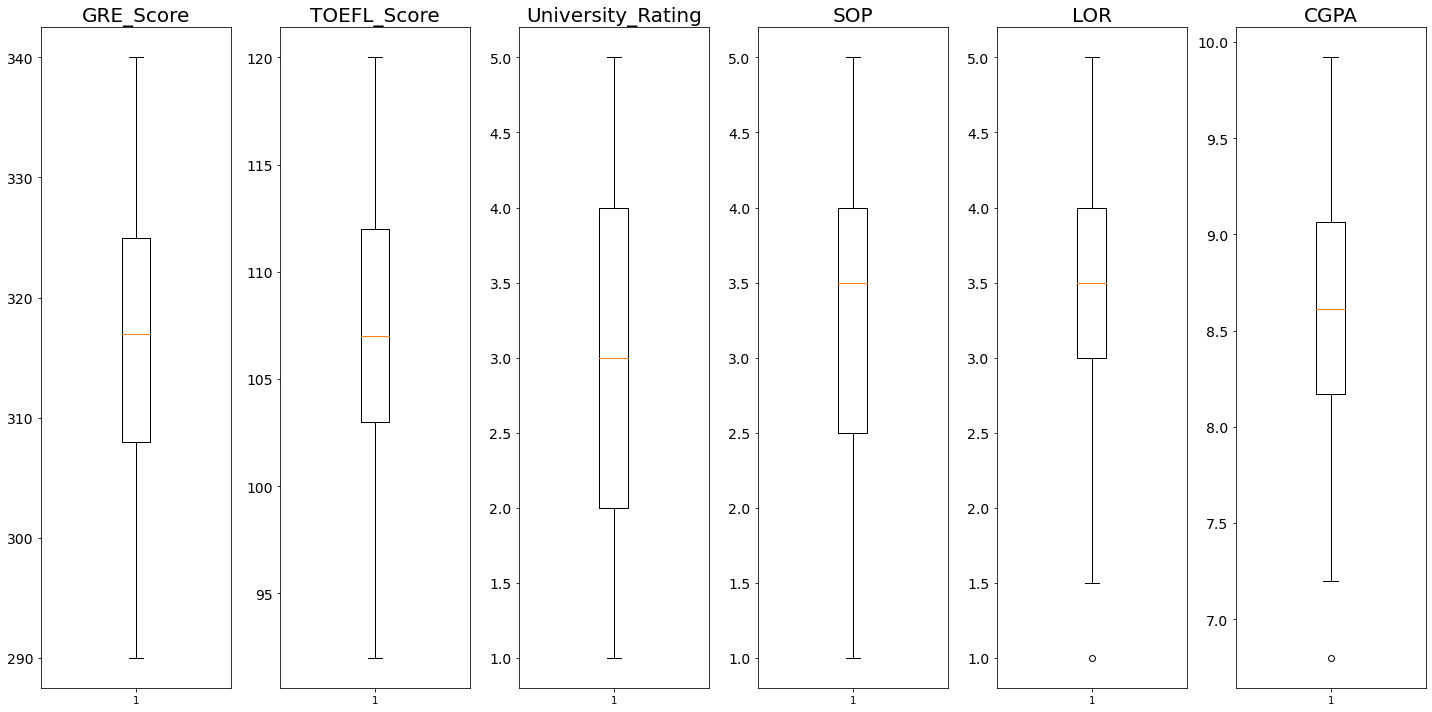

In [242]:
# Box Plot for quantitative variables

df_columns=['GRE_Score', 'TOEFL_Score','University_Rating','SOP','LOR','CGPA']

fig, axs = plt.subplots(1, len(df_columns),figsize = (20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[df_columns[i]])
    ax.set_title(df_columns[i], fontsize=20)
    ax.tick_params(axis='y', labelsize =14)

plt.tight_layout()

#df_column=['GRE_Score', 'TOEFL_Score','University_Rating','SOP','LOR','CGPA']
#for column in df_column:
   # plt.figure()
   # df[column].plot(kind='box', showmeans = True)




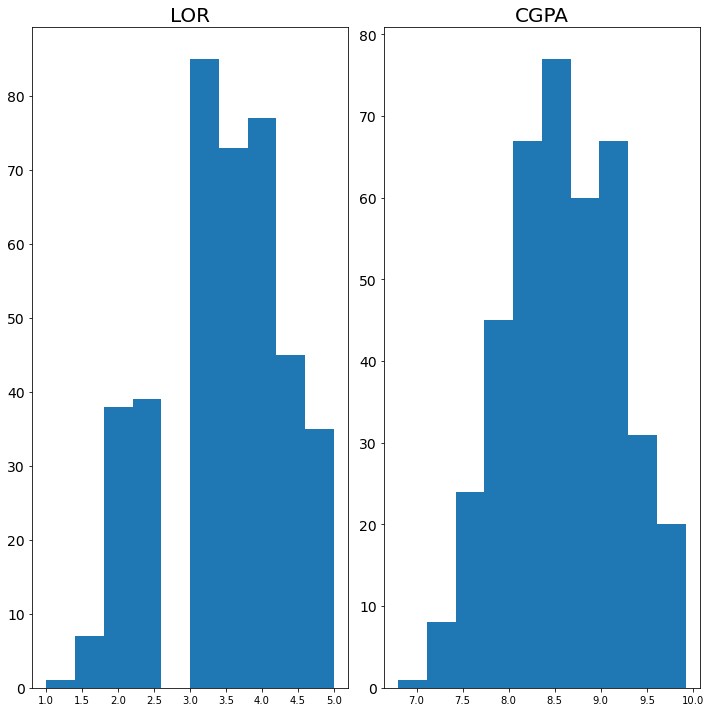

In [245]:
# Investigating outliers

df_columns_out=['LOR','CGPA']

fig_out, axs_out = plt.subplots(1, len(df_columns_out),figsize = (10,10))

for i, ax in enumerate(axs_out.flat):
    ax.hist(df[df_columns_out[i]])
    ax.set_title(df_columns_out[i], fontsize=20)
    ax.tick_params(axis='y', labelsize =14)

plt.tight_layout()


#According to following output, it seems that outliers are not necessary to be considered significatly.
# Therefore outliers were not removed



### 1.5.2 Bivariate Data Analysis

<AxesSubplot:title={'center':'GRE Score'}, ylabel='Density'>

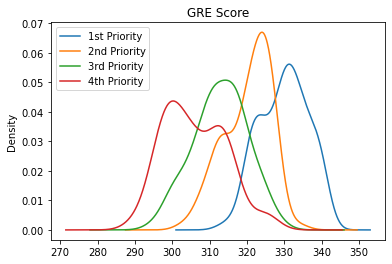

In [266]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : GRE_Score

df.query(" Priority_Admit== '1st_Priority'")['GRE_Score'].plot(kind='kde', title = 'GRE Score', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['GRE_Score'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['GRE_Score'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['GRE_Score'].plot(kind='kde', label='4th Priority', legend=True)

<AxesSubplot:title={'center':'TOEFL_Score'}, ylabel='Density'>

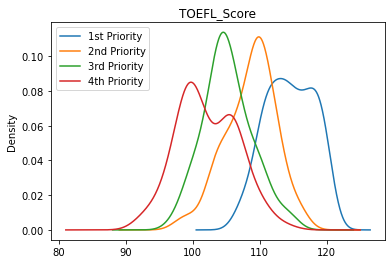

In [267]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : TOEFL_Score

df.query(" Priority_Admit== '1st_Priority'")['TOEFL_Score'].plot(kind='kde', title = 'TOEFL_Score', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['TOEFL_Score'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['TOEFL_Score'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['TOEFL_Score'].plot(kind='kde', label='4th Priority', legend=True)

<AxesSubplot:title={'center':'University_Rating'}, ylabel='Density'>

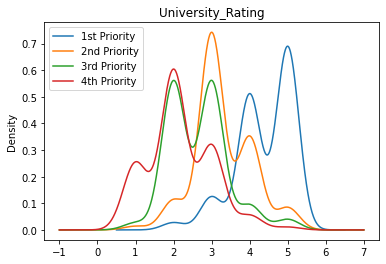

In [268]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : University_Rating

df.query(" Priority_Admit== '1st_Priority'")['University_Rating'].plot(kind='kde', title = 'University_Rating', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['University_Rating'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['University_Rating'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['University_Rating'].plot(kind='kde', label='4th Priority', legend=True)

<AxesSubplot:title={'center':'SOP'}, ylabel='Density'>

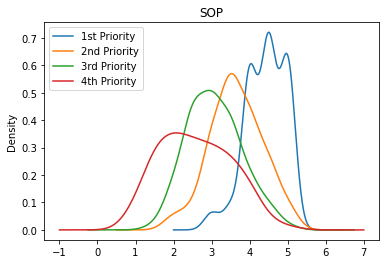

In [269]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : SOP

df.query(" Priority_Admit== '1st_Priority'")['SOP'].plot(kind='kde', title = 'SOP', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['SOP'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['SOP'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['SOP'].plot(kind='kde', label='4th Priority', legend=True)

<AxesSubplot:title={'center':'LOR'}, ylabel='Density'>

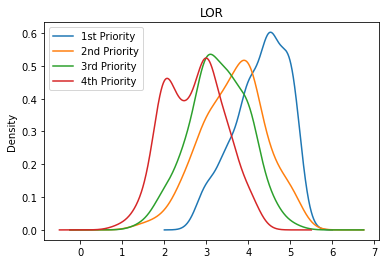

In [270]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : LOR

df.query(" Priority_Admit== '1st_Priority'")['LOR'].plot(kind='kde', title = 'LOR', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['LOR'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['LOR'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['LOR'].plot(kind='kde', label='4th Priority', legend=True)

<AxesSubplot:title={'center':'CGPA'}, ylabel='Density'>

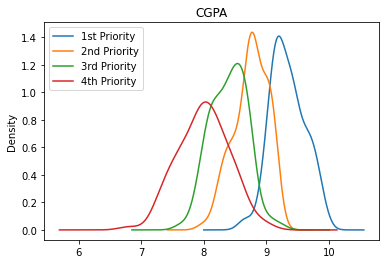

In [271]:
# Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
# Variable : CGPA

df.query(" Priority_Admit== '1st_Priority'")['CGPA'].plot(kind='kde', title = 'CGPA', label='1st Priority', legend=True)
df.query(" Priority_Admit=='2nd_Priority'")['CGPA'].plot(kind='kde', label='2nd Priority', legend=True)
df.query(" Priority_Admit=='3rd_Priority'")['CGPA'].plot(kind='kde', label='3rd Priority', legend=True)
df.query(" Priority_Admit=='4th_Priority'")['CGPA'].plot(kind='kde', label='4th Priority', legend=True)


In [275]:
#Analysing variable by Group
# 'GRE_Score'
df.groupby(by=['Priority_Admit', 'Research']).agg({'GRE_Score': ['min', 'max', 'mean','std']})

GRE_Score                           
                              min  max        mean       std
Priority_Admit Research                                     
4th_Priority   0              290  327  305.329545  8.265315
               1              293  325  308.480000  7.864053
3rd_Priority   0              295  325  311.262295  6.287293
               1              300  329  315.571429  7.796250
2nd_Priority   0              303  327  316.071429  6.073187
               1              307  334  321.953846  5.464175
1st_Priority   0              320  339  328.000000  9.128709
               1              314  340  330.010638  6.241544

In [276]:
#Analysing variable by Group
# 'TOEFL_Score'
df.groupby(by=['Priority_Admit', 'Research']).agg({'TOEFL_Score': ['min', 'max', 'mean','std']})

TOEFL_Score                           
                                min  max        mean       std
Priority_Admit Research                                       
4th_Priority   0                 92  114  101.909091  4.512145
               1                 95  110  102.960000  4.325120
3rd_Priority   0                 99  114  105.049180  3.252826
               1                 97  115  105.514286  4.327555
2nd_Priority   0                 99  113  107.285714  3.408672
               1                 98  116  109.153846  3.763437
1st_Priority   0                114  120  117.500000  2.645751
               1                107  120  114.382979  3.541175

In [277]:
#Analysing variable by Group
#'University_Rating'
df.groupby(by=['Priority_Admit', 'Research']).agg({'University_Rating': ['min', 'max', 'mean','std']})

University_Rating                        
                                      min max      mean       std
Priority_Admit Research                                          
4th_Priority   0                        1   5  2.147727  0.878083
               1                        1   3  2.240000  0.663325
3rd_Priority   0                        2   5  2.590164  0.715939
               1                        1   5  2.771429  0.877353
2nd_Priority   0                        1   5  3.357143  0.951190
               1                        2   5  3.261538  0.667947
1st_Priority   0                        3   5  4.000000  0.816497
               1                        2   5  4.393617  0.736427

In [278]:
#Analysing variable by Group
#'SOP'
df.groupby(by=['Priority_Admit', 'Research']).agg({'SOP': ['min', 'max', 'mean','std']})

SOP                         
                         min  max      mean       std
Priority_Admit Research                              
4th_Priority   0         1.0  5.0  2.500000  0.940775
               1         1.0  4.0  2.880000  0.832666
3rd_Priority   0         2.0  5.0  3.008197  0.680023
               1         1.5  4.5  3.200000  0.739634
2nd_Priority   0         2.0  5.0  3.785714  0.809991
               1         2.0  5.0  3.584615  0.615993
1st_Priority   0         4.0  4.5  4.250000  0.288675
               1         3.0  5.0  4.430851  0.511171

In [279]:
#Analysing variable by Group
#'LOR'
df.groupby(by=['Priority_Admit', 'Research']).agg({'LOR': ['min', 'max', 'mean','std']})

LOR                         
                         min  max      mean       std
Priority_Admit Research                              
4th_Priority   0         1.0  4.0  2.664773  0.668338
               1         1.5  4.0  2.860000  0.714726
3rd_Priority   0         2.0  5.0  3.204918  0.697478
               1         1.5  4.5  3.428571  0.643324
2nd_Priority   0         1.5  5.0  3.803571  0.797441
               1         2.0  5.0  3.569231  0.722825
1st_Priority   0         4.0  5.0  4.375000  0.478714
               1         3.0  5.0  4.292553  0.615261

In [280]:
#Analysing variable by Group
#'CGPA'
df.groupby(by=['Priority_Admit', 'Research']).agg({'CGPA': ['min', 'max', 'mean','std']})

CGPA                          
                          min   max      mean       std
Priority_Admit Research                                
4th_Priority   0         7.20  9.02  7.971023  0.407070
               1         6.80  8.66  8.076800  0.403998
3rd_Priority   0         7.64  9.00  8.385409  0.272510
               1         7.89  9.22  8.429714  0.325689
2nd_Priority   0         8.34  9.14  8.734285  0.226118
               1         8.00  9.16  8.762154  0.284734
1st_Priority   0         9.10  9.70  9.257500  0.295113
               1         8.64  9.92  9.345958  0.272883

### 1.5.3 Finding Correlation

In [301]:
# Checking column names
df.columns

Index(['ID', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance_of_Admit', 'Priority_Admit_Range',
       'Priority_Admit', 'y_act'],
      dtype='object')

                   GRE_Score  TOEFL_Score  University_Rating       SOP  \
GRE_Score           1.000000     0.835977           0.668976  0.612831   
TOEFL_Score         0.835977     1.000000           0.695590  0.657981   
University_Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
y_act              -0.784822    -0.758036          -0.720578 -0.687769   

                        LOR      CGPA     y_act  
GRE_Score          0.557555  0.833060 -0.784822  
TOEFL_Score        0.567721  0.828417 -0.758036  
University_Rating  0.660123  0.746479 -0.720578  
SOP                0.729593  0.718144 -0.687769  
LOR                1.000000  0.670211 -0.651710  
CGPA               0.670211  1.000000 -0.840492  
y_act             -0.651710 -0.840492  1.000000  


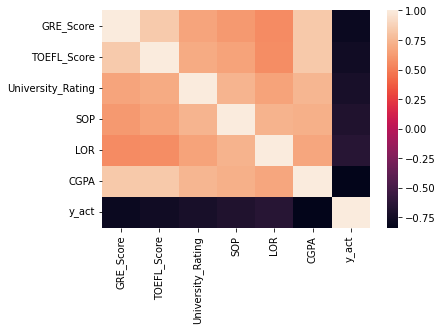

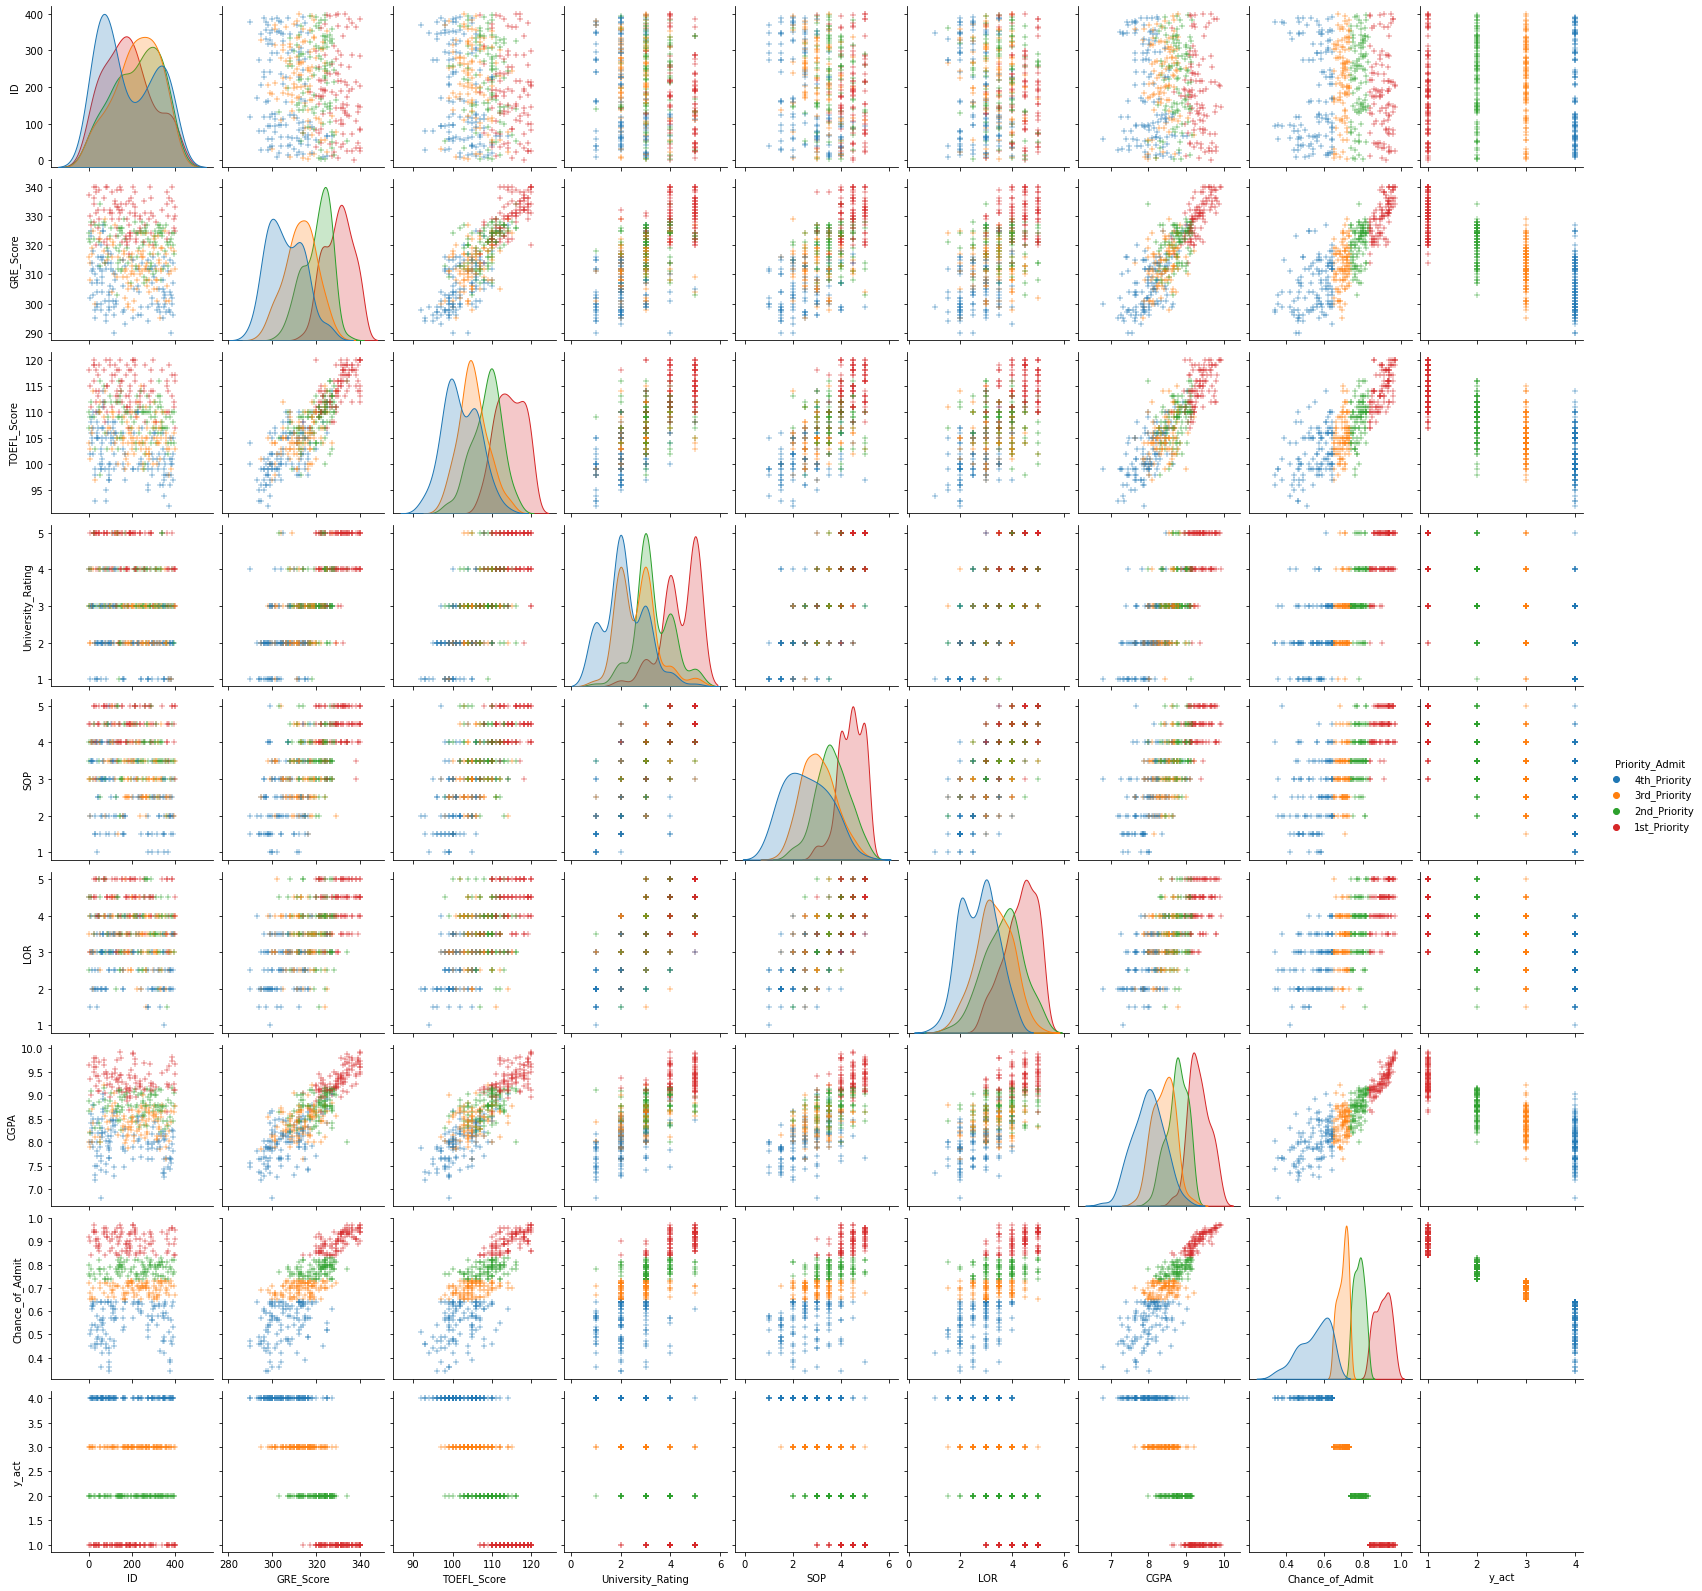

In [304]:
correlation_matrix = df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'y_act']].corr()
sns.heatmap(correlation_matrix)
print(correlation_matrix)
sns.pairplot(df, hue='Priority_Admit', markers='+') #Pair plot
plt.show()

In [306]:
df.to_pickle('adm_data_processed.pkl')

In [706]:
# load pickle file
df = pd.read_pickle('adm_data_processed.pkl')

# Feature Selection
X_variables = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research']

#Check point
print(df[X_variables].head())

#Convert X dataframe to array
X = df[X_variables].values
print(f" X =\n {X}")

# Target Variable
y_variable = 'y_act'

#Check point
print(df[y_variable].head())

#Convert X dataframe to array
y = df[y_variable].values
print(f" y =\n {y}")


   GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA Research
0        337          118                  4  4.5  4.5  9.65        1
1        324          107                  4  4.0  4.5  8.87        1
2        316          104                  3  3.0  3.5  8.00        1
3        322          110                  3  3.5  2.5  8.67        1
4        314          103                  2  2.0  3.0  8.21        0
 X =
 [[337.         118.           4.         ...   4.5          9.64999962
    1.        ]
 [324.         107.           4.         ...   4.5          8.86999989
    1.        ]
 [316.         104.           3.         ...   3.5          8.
    1.        ]
 ...
 [330.         116.           4.         ...   4.5          9.44999981
    1.        ]
 [312.         103.           3.         ...   4.           8.77999973
    0.        ]
 [333.         117.           4.         ...   4.           9.65999985
    1.        ]]
0    1
1    2
2    3
3    2
4    3
Name: y_act, dtype:

## Preparation of Dataset

#### Note: Dataset has been prepaired as per the following requirement:
#### Requirement:
#### Since priroty of being selecetd is needed to investigate, new column 'Priority_Admit' was created by using the values in 'Chance of Admit' column. 'Priority_Admit' has 4 levels as '1st_Priority', '2nd_Priority', '3rd_Priority', 'No Chance' which were created based on the values in 'Chance of Admit' column

In [1574]:
# From URL (GitHub raw file link)
file_path_url = 'https://raw.githubusercontent.com/MPDhanushika/DialogMachineLearningProject/main/adm_data.csv?token=GHSAT0AAAAAAB3PPDJSO4ZNYMGVE2LHPHRAY4ALFYQ'
#file_path_url = 'E:/Dialog ML class work/Datasets/adm_data.csv'

# Load CSV File
original_data = pd.read_csv(file_path_url)

# Since I need to keep original dataset as it is
census_data = original_data.copy()

#rename column label
dict_colName = {'Serial No.':'ID','GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'}
census_data.rename(columns=dict_colName, inplace=True)
    
#Grouping values in 'Chance_of_Admit' as per quartile range 
#and create a new column (Priority_Admit)
census_data['Priority_Admit_Range'] = pd.qcut(census_data['Chance_of_Admit'], 4)
census_data['Priority_Admit'] = pd.qcut(census_data['Chance_of_Admit'], 4, labels = ['4th_Priority','3rd_Priority','2nd_Priority','1st_Priority'])

#Encoding: values in 'Priority_Admit' were converted to numbers 
census_data['y_act'] = census_data['Priority_Admit']
encoding_dict = {'1st_Priority':1,'2nd_Priority':2,'3rd_Priority':3,'4th_Priority':4}
census_data['y_act'].replace(encoding_dict, inplace=True)
census_data

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Priority_Admit_Range,Priority_Admit,y_act
0,1,337,118,4,4.5,4.5,9.65,1,0.92,"(0.83, 0.97]",1st_Priority,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,"(0.73, 0.83]",2nd_Priority,2
2,3,316,104,3,3.0,3.5,8.00,1,0.72,"(0.64, 0.73]",3rd_Priority,3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,"(0.73, 0.83]",2nd_Priority,2
4,5,314,103,2,2.0,3.0,8.21,0,0.65,"(0.64, 0.73]",3rd_Priority,3
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,"(0.73, 0.83]",2nd_Priority,2
396,397,325,107,3,3.0,3.5,9.11,1,0.84,"(0.83, 0.97]",1st_Priority,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,"(0.83, 0.97]",1st_Priority,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,"(0.64, 0.73]",3rd_Priority,3


### Optimizing Memory usage

In [1540]:
memory_usage = census_data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print("----------------------------------------------")
print("Data: Memory Usage & Data Type (Before Converting)")
print("----------------------------------------------")
print(F"total memory usage:{total_memory_usage} KB")
census_data.dtypes   


----------------------------------------------
Data: Memory Usage & Data Type (Before Converting)
----------------------------------------------
total memory usage:30.05078125 KB


ID                         int64
GRE_Score                  int64
TOEFL_Score                int64
University_Rating          int64
SOP                      float64
LOR                      float64
CGPA                     float64
Research                   int64
Chance_of_Admit          float64
Priority_Admit_Range    category
Priority_Admit          category
y_act                   category
dtype: object

In [1541]:
census_data['GRE_Score'] = census_data['GRE_Score'].astype('int16')
census_data['TOEFL_Score'] = census_data['TOEFL_Score'].astype('int8')
census_data['University_Rating'] = census_data['University_Rating'].astype('int8')
census_data['SOP'] = census_data['SOP'].astype('float32')
census_data['LOR'] = census_data['LOR'].astype('float32')
census_data['CGPA'] = census_data['CGPA'].astype('float32')
census_data['Research'] = census_data['Research'].astype('int8')
census_data['Chance_of_Admit'] = census_data['Chance_of_Admit'].astype('float32')
census_data['y_act'] = census_data['y_act'].astype('int8')
    
# Check memory usage of each column in bytes After converting
memory_usage = census_data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print("----------------------------------------------")
print("Data: Memory Usage & Data Type (After Converting)")
print("----------------------------------------------")
print(F"total memory usage:{total_memory_usage} KB")
data.dtypes

----------------------------------------------
Data: Memory Usage & Data Type (After Converting)
----------------------------------------------
total memory usage:13.0546875 KB


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## 1. Data Pre-processing Function

In [1542]:
def pre_processing(data): 
        
    #Checking duplicates and remove 
    duplicates = data.loc[data.duplicated()]
    data.drop_duplicates(keep='first', inplace=True)
    
    #Checking missing values and if there are missing values, remove the relevant records
    #and print a message 
    if data.isnull().values.any():
        print(f"Incomplete Application. Missing values in {data.columns[data.isnull().any()].tolist()}")
        data.dropna(how ='any', axis =0, inplace = True)
        
    return data

# Preprocess Data

processed_data = pre_processing(census_data)

# Save preprocessed data as pickle file
processed_data.to_pickle('adm_data_processed.pkl')
print(" Processed File was saved as adm_data_processed.pkl")


 Processed File was saved as adm_data_processed.pkl


## 2. Data Exploring Function for preprocessed data

----------------------------------------------
Exploring Data: Univariate Analysis
----------------------------------------------


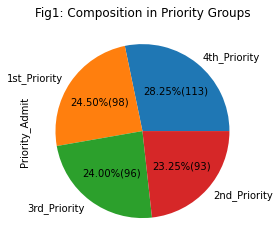

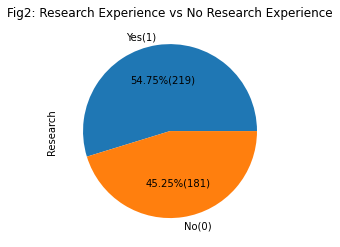

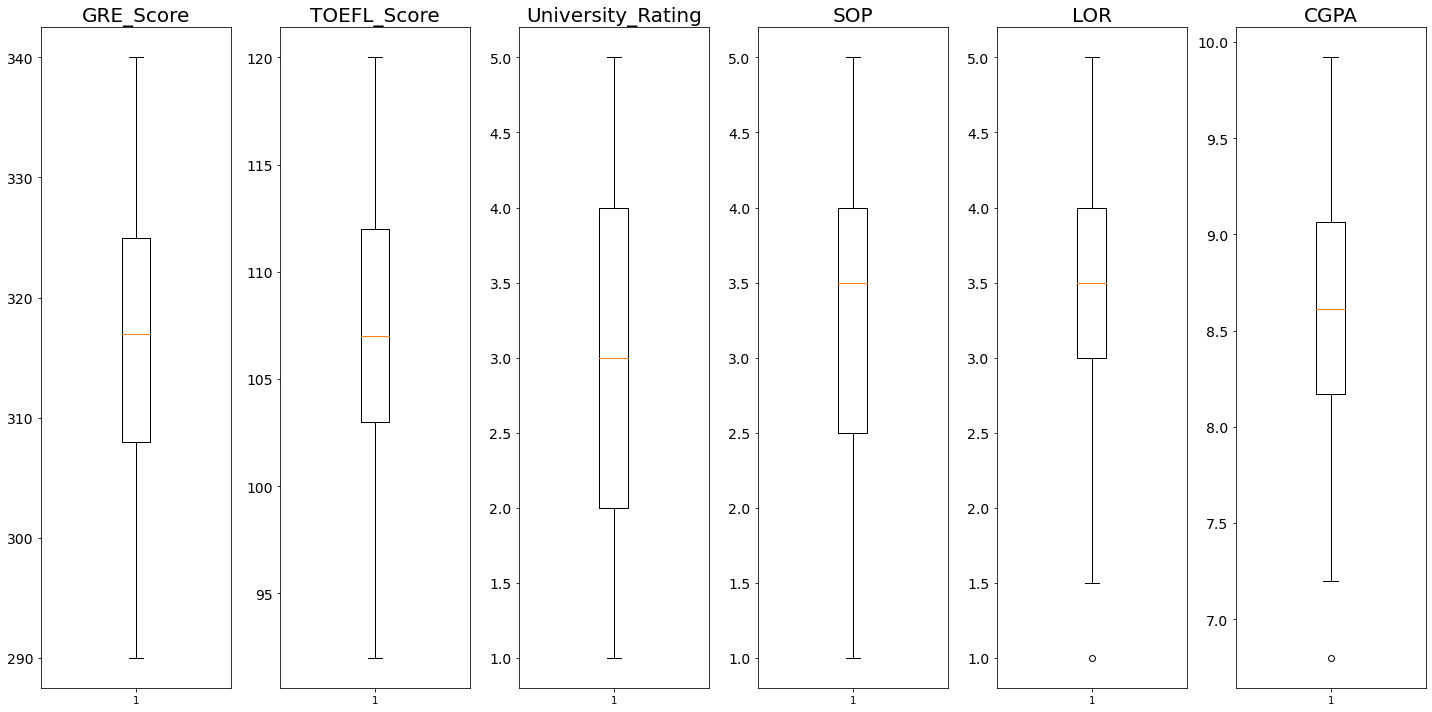

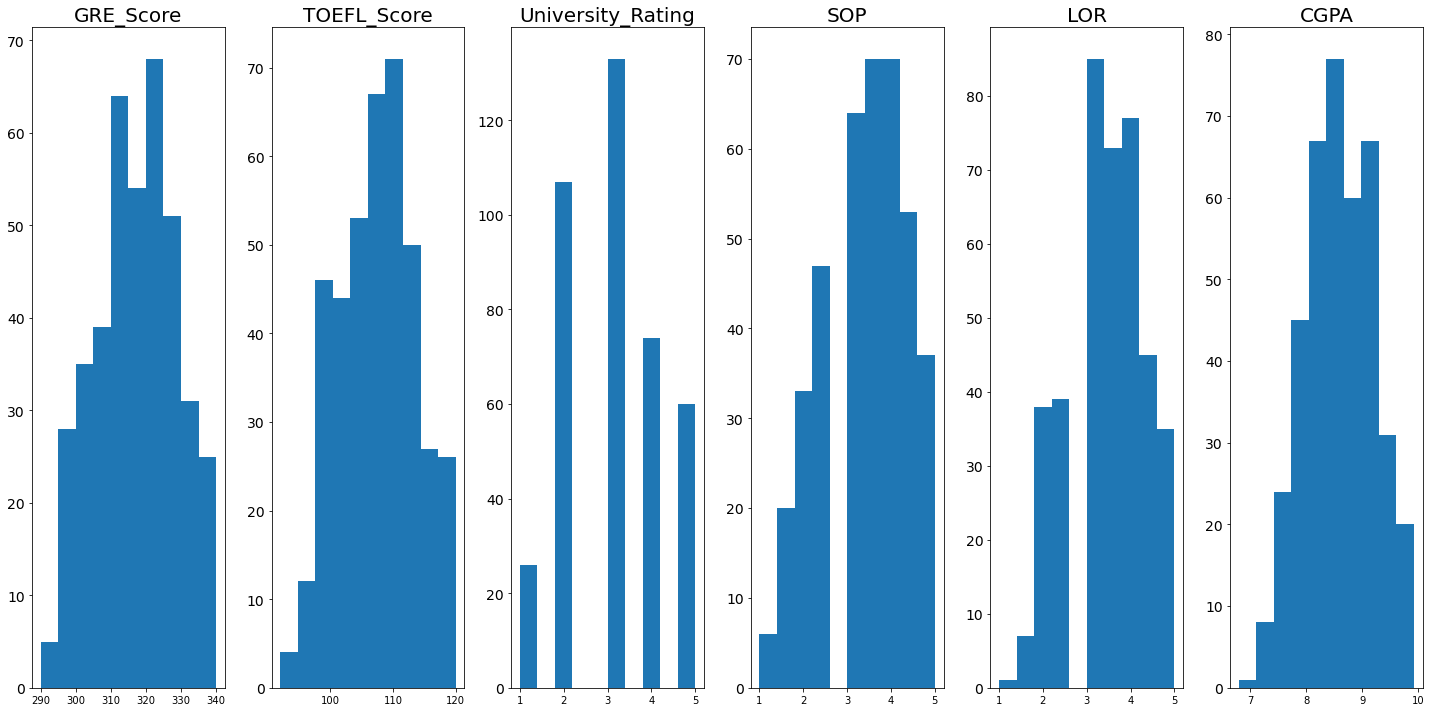

----------------------------------------------
Exploring Data: Bivariate Analysis - Density Functions BY Group
----------------------------------------------


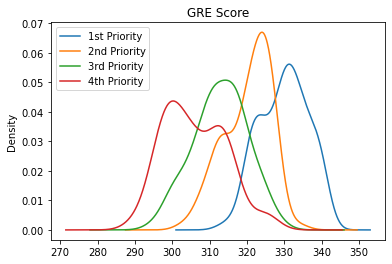

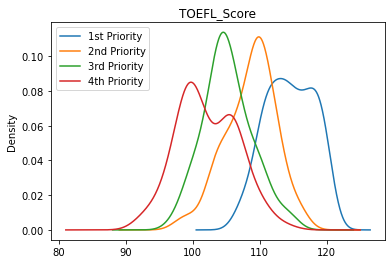

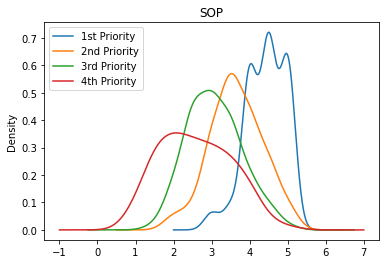

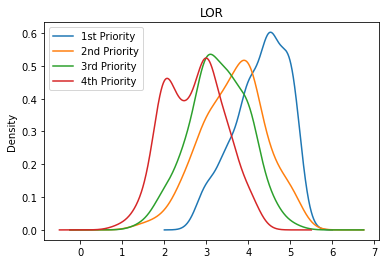

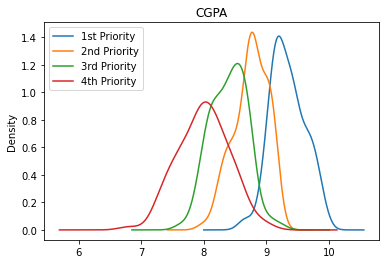

----------------------------------------------
Exploring Data: Bivariate Analysis - Descriptive Statistics by Group
----------------------------------------------
                        GRE_Score                           
                              min  max        mean       std
Priority_Admit Research                                     
4th_Priority   0              290  327  305.329545  8.265315
               1              293  325  308.480000  7.864053
3rd_Priority   0              295  325  311.262295  6.287293
               1              300  329  315.571429  7.796250
2nd_Priority   0              303  327  316.071429  6.073187
               1              307  334  321.953846  5.464175
1st_Priority   0              320  339  328.000000  9.128709
               1              314  340  330.010638  6.241544
                        TOEFL_Score                           
                                min  max        mean       std
Priority_Admit Research                 

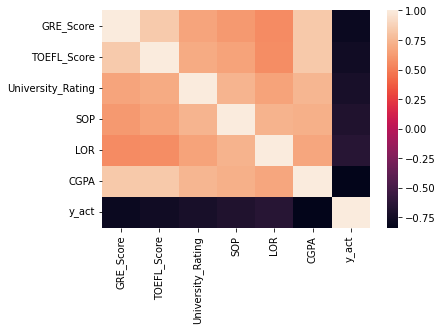

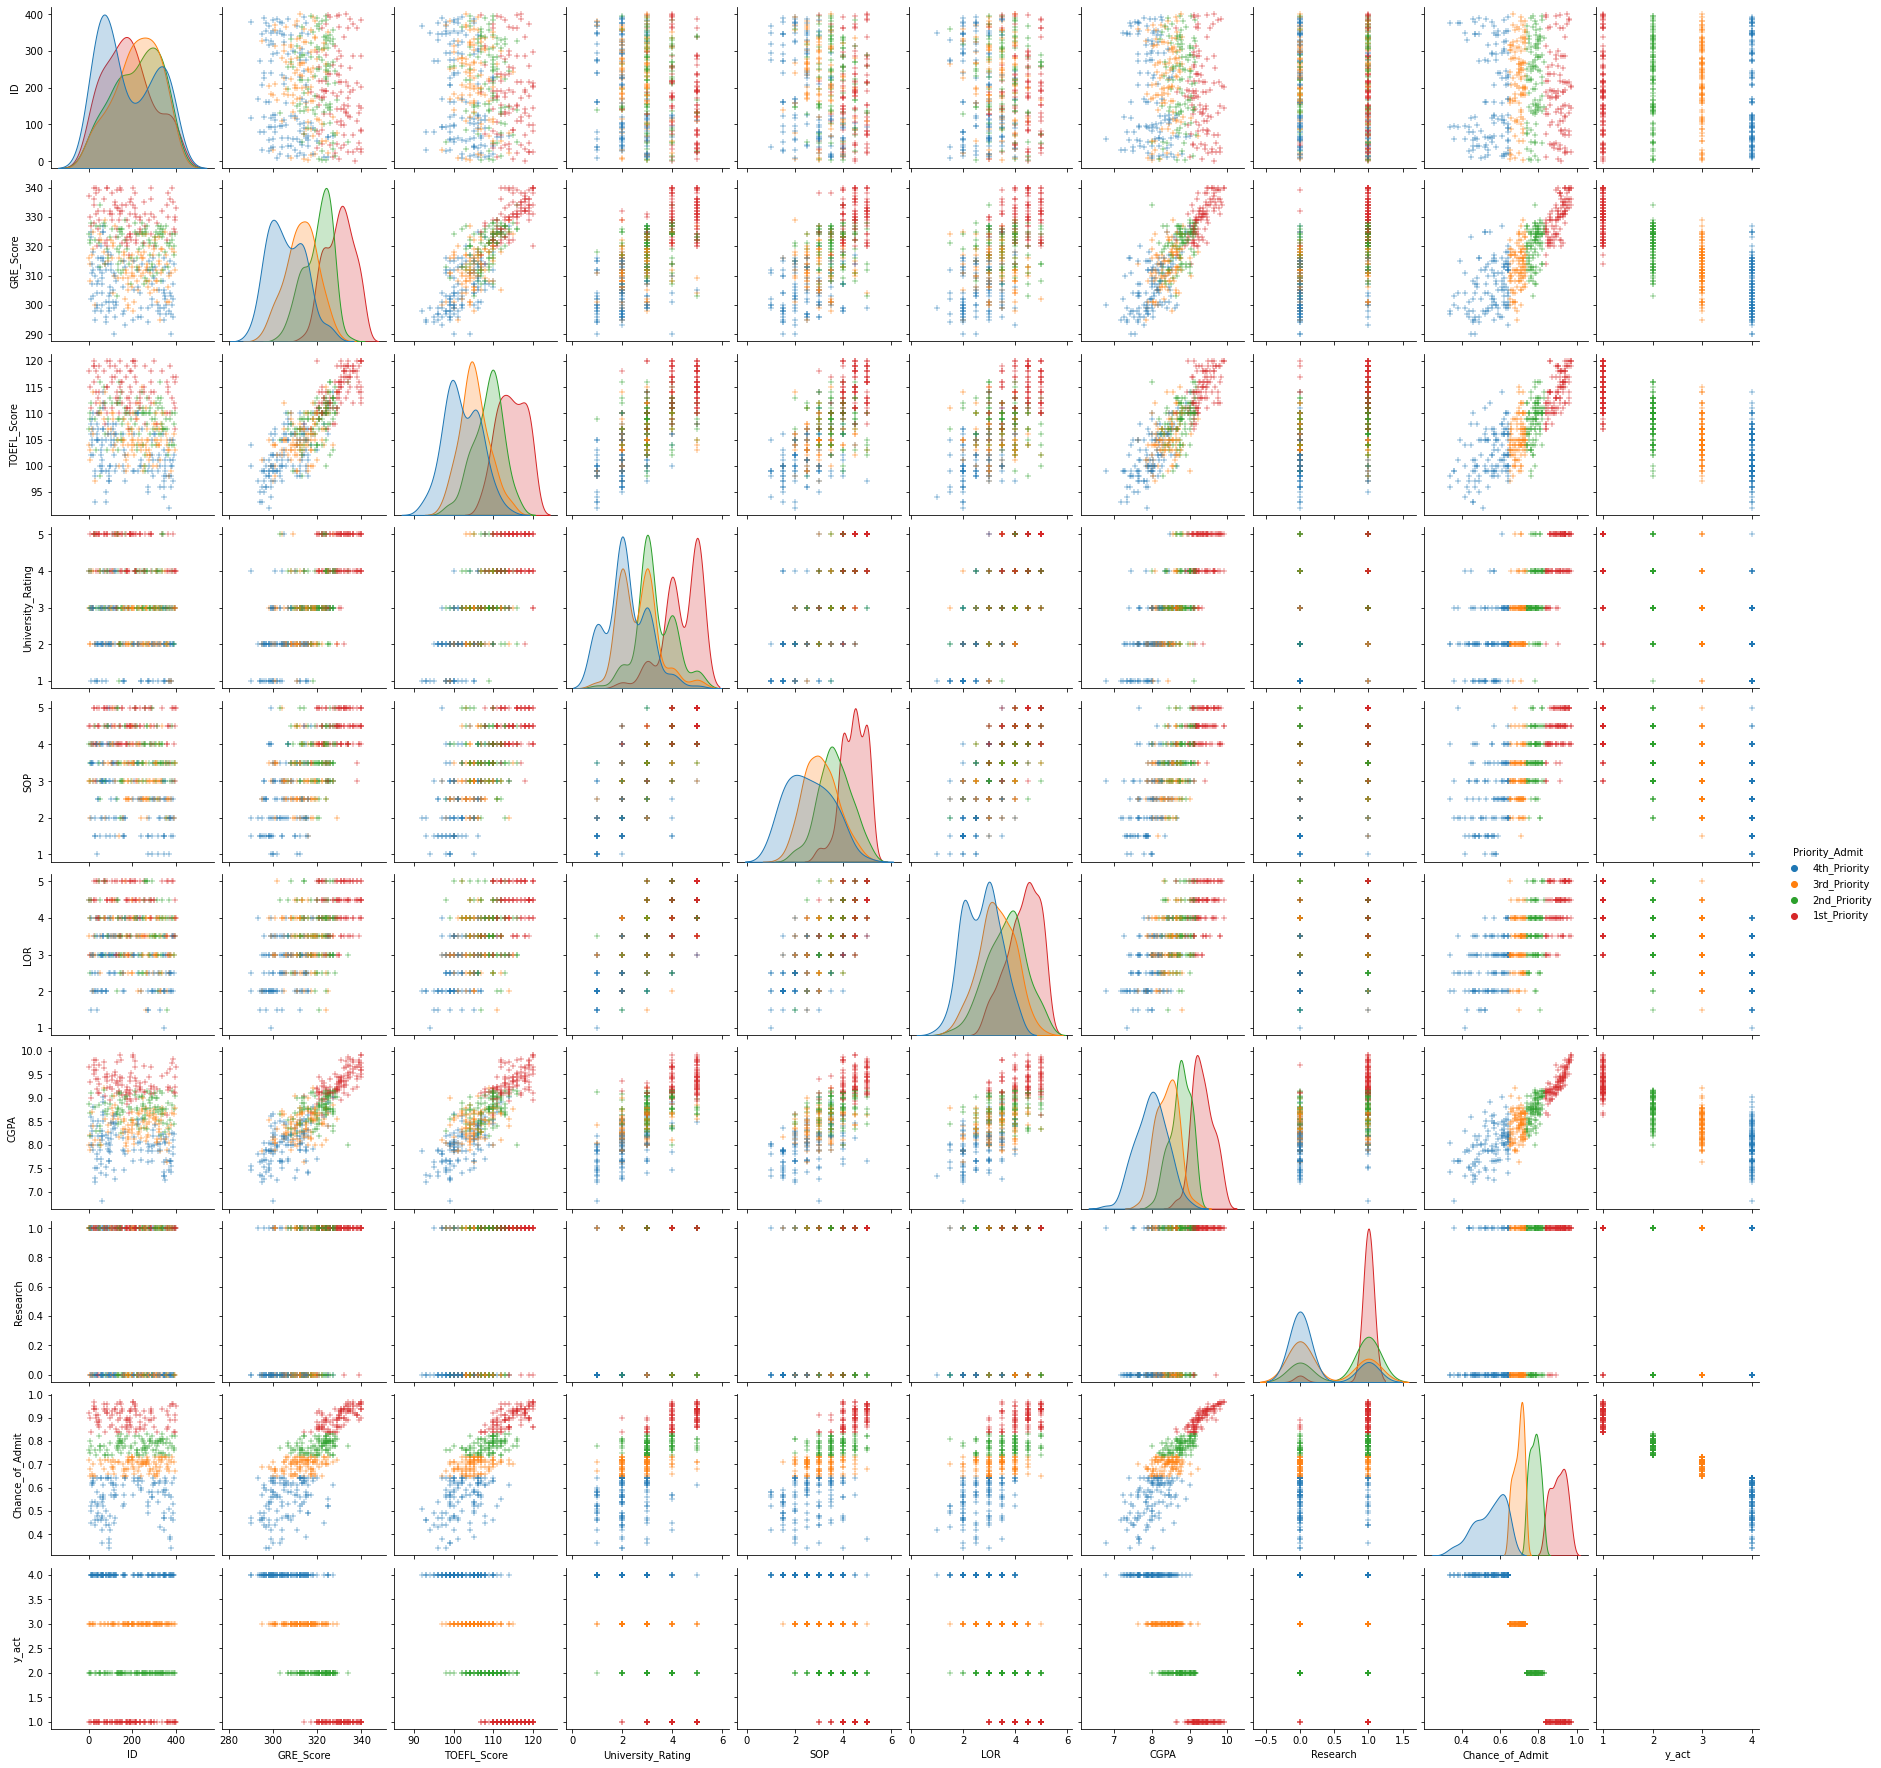

In [1543]:
def data_explore(data): 
       
    #Exploring Data: Univariate Analysis
    print("----------------------------------------------")
    print("Exploring Data: Univariate Analysis")
    print("----------------------------------------------")
    
    #pie chart for 'Priority_Admit'
    count_priority=data['Priority_Admit'].value_counts()
    data['Priority_Admit'].value_counts().plot(kind='pie',title='Fig1: Composition in Priority Groups',autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*count_priority.sum()))
    plt.show()
    #pie chart for 'Research'
    count_Research=df['Research'].value_counts()
    data['Research'].value_counts().plot(kind='pie',labels = ['Yes(1)','No(0)'],title='Fig2: Research Experience vs No Research Experience',autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*count_Research.sum()))
    plt.show()
    
    # Box Plot for quantitative variables
    data_columns=['GRE_Score', 'TOEFL_Score','University_Rating','SOP','LOR','CGPA']
    fig, axs = plt.subplots(1, len(data_columns),figsize = (20,10))
    for i, ax in enumerate(axs.flat):
        ax.boxplot(data[data_columns[i]])
        ax.set_title(data_columns[i], fontsize=20)
        ax.tick_params(axis='y', labelsize =14)
    plt.tight_layout()
    plt.show()
    
      # Histogram for quantitative variables
    data_columns=['GRE_Score', 'TOEFL_Score','University_Rating','SOP','LOR','CGPA']
    fig, axs = plt.subplots(1, len(data_columns),figsize = (20,10))
    for i, ax in enumerate(axs.flat):
        ax.hist(data[data_columns[i]])
        ax.set_title(data_columns[i], fontsize=20)
        ax.tick_params(axis='y', labelsize =14)
    plt.tight_layout()
    plt.show()
    
    #Exploring Data: Bivariate Analysis
    print("----------------------------------------------")
    print("Exploring Data: Bivariate Analysis - Density Functions BY Group")
    print("----------------------------------------------")
    
    # Plotting Density distribution for each quantitative variable according to priroty level (Priority_Admit)
    # Variable : GRE_Score
    data.query(" Priority_Admit== '1st_Priority'")['GRE_Score'].plot(kind='kde', title = 'GRE Score', label='1st Priority', legend=True)
    data.query(" Priority_Admit=='2nd_Priority'")['GRE_Score'].plot(kind='kde', label='2nd Priority', legend=True)
    data.query(" Priority_Admit=='3rd_Priority'")['GRE_Score'].plot(kind='kde', label='3rd Priority', legend=True)
    data.query(" Priority_Admit=='4th_Priority'")['GRE_Score'].plot(kind='kde', label='4th Priority', legend=True)
    plt.show()
    # Variable : TOEFL_Score
    data.query(" Priority_Admit== '1st_Priority'")['TOEFL_Score'].plot(kind='kde', title = 'TOEFL_Score', label='1st Priority', legend=True)
    data.query(" Priority_Admit=='2nd_Priority'")['TOEFL_Score'].plot(kind='kde', label='2nd Priority', legend=True)
    data.query(" Priority_Admit=='3rd_Priority'")['TOEFL_Score'].plot(kind='kde', label='3rd Priority', legend=True)
    data.query(" Priority_Admit=='4th_Priority'")['TOEFL_Score'].plot(kind='kde', label='4th Priority', legend=True)
    plt.show()
    # Variable : SOP
    data.query(" Priority_Admit== '1st_Priority'")['SOP'].plot(kind='kde', title = 'SOP', label='1st Priority', legend=True)
    data.query(" Priority_Admit=='2nd_Priority'")['SOP'].plot(kind='kde', label='2nd Priority', legend=True)
    data.query(" Priority_Admit=='3rd_Priority'")['SOP'].plot(kind='kde', label='3rd Priority', legend=True)
    data.query(" Priority_Admit=='4th_Priority'")['SOP'].plot(kind='kde', label='4th Priority', legend=True) 
    plt.show()
    # Variable : LOR
    data.query(" Priority_Admit== '1st_Priority'")['LOR'].plot(kind='kde', title = 'LOR', label='1st Priority', legend=True)
    data.query(" Priority_Admit=='2nd_Priority'")['LOR'].plot(kind='kde', label='2nd Priority', legend=True)
    data.query(" Priority_Admit=='3rd_Priority'")['LOR'].plot(kind='kde', label='3rd Priority', legend=True)
    data.query(" Priority_Admit=='4th_Priority'")['LOR'].plot(kind='kde', label='4th Priority', legend=True)
    plt.show()
    # Variable : CGPA
    data.query(" Priority_Admit== '1st_Priority'")['CGPA'].plot(kind='kde', title = 'CGPA', label='1st Priority', legend=True)
    data.query(" Priority_Admit=='2nd_Priority'")['CGPA'].plot(kind='kde', label='2nd Priority', legend=True)
    data.query(" Priority_Admit=='3rd_Priority'")['CGPA'].plot(kind='kde', label='3rd Priority', legend=True)
    data.query(" Priority_Admit=='4th_Priority'")['CGPA'].plot(kind='kde', label='4th Priority', legend=True)
    plt.show()
    
    print("----------------------------------------------")
    print("Exploring Data: Bivariate Analysis - Descriptive Statistics by Group")
    print("----------------------------------------------")
    #Analysing variable by Group
    # 'GRE_Score'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'GRE_Score': ['min', 'max', 'mean','std']}))
    # 'TOEFL_Score'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'TOEFL_Score': ['min', 'max', 'mean','std']}))
    #'University_Rating'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'University_Rating': ['min', 'max', 'mean','std']}))
    #'SOP'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'SOP': ['min', 'max', 'mean','std']}))
    #'LOR'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'LOR': ['min', 'max', 'mean','std']}))
    #'CGPA'
    print(data.groupby(by=['Priority_Admit', 'Research']).agg({'CGPA': ['min', 'max', 'mean','std']}))
    
    print("----------------------------------------------")
    print("Finding Correlations")
    print("----------------------------------------------")
    correlation_matrix = df[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'y_act']].corr()
    sns.heatmap(correlation_matrix)
    print(correlation_matrix)
    sns.pairplot(data, hue='Priority_Admit', markers='+') #Pair plot
    plt.show()
     
    return

# load pickle file
df = pd.read_pickle('adm_data_processed.pkl')
data_explore(df)

## 3. Function for identifing features and target, then for standarization numeric feature variables

In [1544]:

def feature_target_selection(feature_set, df):
    
    # Feature Selection
    X_stand = df[feature_set]
  
    #Standarization
    
    #scaler = StandardScaler()
    #scaler.fit(X_stand)
    #X_stand_new= pd.DataFrame(scaler.transform(X_stand), columns=X_stand.columns)
    X_stand_new = X_stand
       
    # Target Variable
    y_variable = 'y_act'
    
    #Convert X dataframe to array
    ##X = X_stand_new.values
    #Convert y dataframe to array
    ##y = df[y_variable].values
    
    return (X_stand_new,df[y_variable]) 

#X = feature_target_selection(feature_set, df)[0]
#X
#y = feature_target_selection(feature_set, df)[1]
#y

### *load pickle file to get porcessed data*

In [1545]:
# load pickle file
df = pd.read_pickle('adm_data_processed.pkl')
df.columns

Index(['ID', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Chance_of_Admit', 'Priority_Admit_Range',
       'Priority_Admit', 'y_act'],
      dtype='object')

In [1546]:
df.dtypes

ID                         int64
GRE_Score                  int16
TOEFL_Score                 int8
University_Rating           int8
SOP                      float32
LOR                      float32
CGPA                     float32
Research                    int8
Chance_of_Admit          float32
Priority_Admit_Range    category
Priority_Admit          category
y_act                       int8
dtype: object

## 4. Train Test Split Function

In [1547]:
# Getting all variable

feature_set = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research'] 

# Remove less importance variable 'LOR' for logistic regression

#feature_set = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'CGPA', 'Research' ] 



def split_data(feature_set, df):
    # Train Test Split
    X = feature_target_selection(feature_set,df)[0]
    
    y = feature_target_selection(feature_set,df)[1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

    return (X_train, X_test, y_train, y_test)

#TO Check

X = feature_target_selection(feature_set,df)[0]
print(f"X:\n{X}")
y = feature_target_selection(feature_set,df)[1]
print(f"y:\n{y}")

X_train = split_data(feature_set, df)[0]
print(F"Train (X) sample size = {len(X_train)}")

X_test = split_data(feature_set, df)[1]
print(F"Test (X) sample size  = {len(X_test)}")

y_train = split_data(feature_set, df)[2]
print(F"Train (y) sample size = {len(y_train)}")

y_test = split_data(feature_set, df)[3]
print(F"Test (y) sample size  = {len(y_test)}")
 

X:
     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
395        324          110                  3  3.5  3.5  9.04         1
396        325          107                  3  3.0  3.5  9.11         1
397        330          116                  4  5.0  4.5  9.45         1
398        312          103                  3  3.5  4.0  8.78         0
399        333          117                  4  5.0  4.0  9.66         1

[400 rows x 7 columns]
y:
0      1
1      2
2      3
3      2
4      3
      ..
395    2
396    1
397    1
398    3
399 

## 5. Model Training Function

In [1548]:

def model_train(model, model_name,X_train, X_test, y_train, y_test):
            
    #Fit Model
    model.fit(X_train, y_train)
    
    #Creating a new dataframe which contains actual y, predicted y and predicted probability

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
    
    #Calculating evaluation metrics

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision_val = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='weighted', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  
    #roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'],multi_class= 'ovr',average='weighted',pos_label=1)
   
    
    #plot ROC
    
    cmap = cm.get_cmap('cool') 
    #This fuction will give thresholds values and FPR and TPR based on it
    fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
    #convert numpy array to dataframe for later reference allways
    roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
    roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)
    
    #plot PRC
    
    precision_PRC, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
    #store result as a dataframe object
    prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision_PRC[:-1], 'Recall':recall[:-1]})
    #print(prc)
    prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)
    
    return ({'model_name':model_name,'model':model,'accuracy':accuracy,'precision':precision_val,'f1_score':f1_score})

## 6. Fitting Multipe Models 

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


,model_name,model,accuracy,precision,f1_score
0,lgr1,"LogisticRegression(C=0.5, multi_class='multino...",0.475000,0.507691,0.483007
1,dtc1,"DecisionTreeClassifier(max_depth=10, random_st...",0.616667,0.600344,0.607517
2,rf1,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.625000,0.631497,0.626508
3,svm1,"SVC(kernel='linear', probability=True)",0.641667,0.669670,0.652687
4,knn1,KNeighborsClassifier(),0.650000,0.668070,0.651789


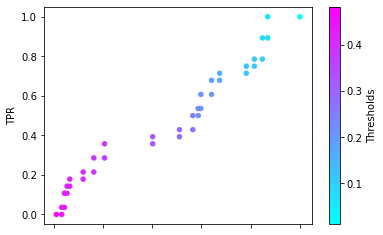

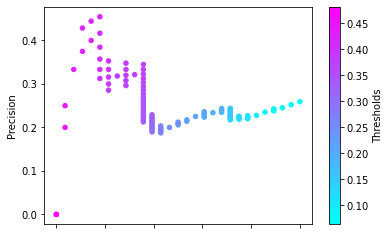

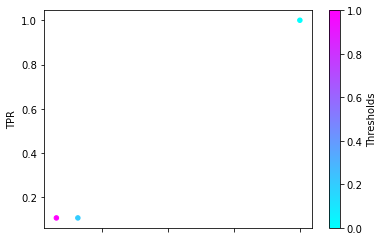

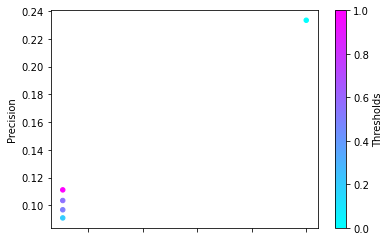

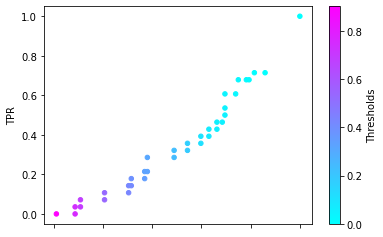

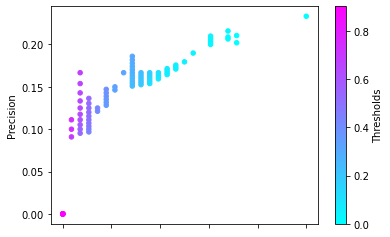

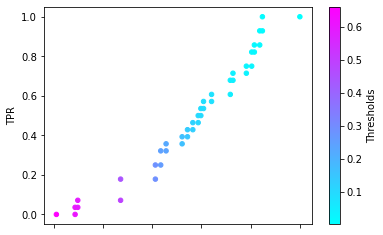

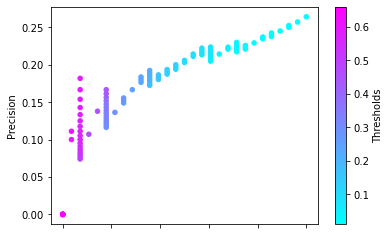

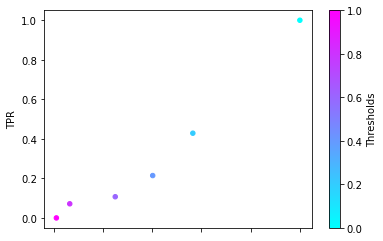

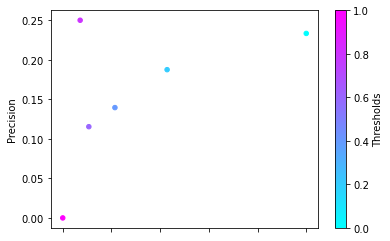

In [1549]:
models = []
models.append(model_train(LogisticRegression(C = 0.5, multi_class = "multinomial", n_jobs=3, verbose=1), 'lgr1',X_train, X_test, y_train, y_test))
models.append(model_train(DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2),'dtc1',X_train, X_test, y_train, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=3, verbose=1,min_samples_split=2), 'rf1',X_train, X_test, y_train, y_test))
models.append(model_train(svm.SVC(kernel='linear', C=1.0, probability=True), 'svm1',X_train, X_test, y_train, y_test))
models.append(model_train(KNeighborsClassifier(n_neighbors=5),'knn1',X_train, X_test, y_train, y_test))
models = pd.DataFrame(models)
models

# with all features
#models_withAll = models

# without CGPA which is higly correlated variable with other X variables
#models_withoutCGPA = models

## 7. Function to evaluate a model

In [1550]:
def evaluate_model(model, X_test):
    
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    #print(y_pred_prob[:5])

    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
    print(test_result.sample(10))
    print('\n')

    from sklearn import metrics

    cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
    print("Confusion Matrix:\n", cfm)
    print('\n')

    # Model evaluation
    # Use Scikit-Learn function 
    print("classification_report:\n",classification_report(test_result['y_act'], test_result['y_pred']))
    
       
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  
    print("f1_score:",f1_score)
    recall_score = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='weighted')  
    print("Recall_score:",recall_score)
    precision_score = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='weighted')  
    print("Precision_score:",precision_score)
    accuracy_score = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    print("accuracy_score:",accuracy_score)
    
    final_Score= ({"f1_score:":f1_score,"Recall_score:":recall_score,"Precision_score:":precision_score,"accuracy_score:":accuracy_score})
    return final_Score

  


## 8. Hyperparameter tuning with Grid Search and Random Search

### 8.1 Hyperparameter tuning with Logistic Regression Model & getting best model

In [1551]:


final_models = []   # to append Best Model info in to final_models
final_models_name = []   # to append Best Model Name info in to final_models_name

  
# Define Hyperparameter Grid
param_grid = {'C': [0.5, 1, 2, 5, 10]}
  
# Create model object
model = LogisticRegression(multi_class = 'multinomial')
  
# Create GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')

#Standarization X_train

scaler = StandardScaler()
scaler.fit(X_train)
X_stand_new= pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

#Standarization X_test

scaler = StandardScaler()
scaler.fit(X_test)
X_stand_test= pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
   

model_cv.fit(X_stand_new, y_train)

# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

# get best model

model = model_cv.best_estimator_

# Feature importance/Coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

feature_profile_lgr= pd.DataFrame({"feature":feature_set, "coefficients":coefficients})
print("feature_profile_lgr:\n", feature_profile_lgr)
print("intercept:", intercept)
print('\n')
print("Model Parameters_lgr:\n", pd.Series(model.get_params()))

# Evaluate Model
eval_Result = evaluate_model(model, X_stand_test)


# Appending Best Model info to final_models

final_models.append(eval_Result)  #evaluation metrics
final_models_name.append(model)   # Model name



Tuned Model Parameters: {'C': 0.5}
Best model score: 0.6702419128960058
feature_profile_lgr:
              feature  coefficients
0          GRE_Score      0.859372
1        TOEFL_Score      0.765637
2  University_Rating      0.768618
3                SOP      0.710415
4                LOR      0.381100
5               CGPA      1.734045
6           Research      0.806966
intercept: -2.152848577792963


Model Parameters_lgr:
 C                            0.5
class_weight                None
dual                       False
fit_intercept               True
intercept_scaling              1
l1_ratio                    None
max_iter                     100
multi_class          multinomial
n_jobs                      None
penalty                       l2
random_state                None
solver                     lbfgs
tol                       0.0001
verbose                        0
warm_start                 False
dtype: object
     y_act  y_pred  y_pred_prob
272      4       4     0.00023

### 8.2 Hyperparameter tuning with Decision Tree Model

In [1552]:
# Define Hyperparameter Grid
param_grid = {"max_depth": [5, 10],
              "min_samples_leaf": [2, 10, 100],
              "min_samples_split": [2, 10, 100]
             }
  
# Create model object
model = DecisionTreeClassifier()

# Create GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted')

model_cv.fit(X_train, y_train)

  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

# get best model

model = model_cv.best_estimator_

# Feature importance/Coefficients
importance = model.feature_importances_
feature_profile_dtc = pd.DataFrame({"feature":feature_set, "importance":importance})
print("feature_profile_dtc:\n", feature_profile_dtc)
print('\n')
print("Model Parameters_dtc:\n", pd.Series(model.get_params()))

# Evaluate Model
eval_Result = evaluate_model(model, X_test)


# Appending Best Model info to final_models

final_models.append(eval_Result)  #evaluation metrics
final_models_name.append(model)   # Model name


Tuned Model Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best model score: 0.6220577843714898
feature_profile_dtc:
              feature  importance
0          GRE_Score    0.171841
1        TOEFL_Score    0.041594
2  University_Rating    0.047956
3                SOP    0.055191
4                LOR    0.077831
5               CGPA    0.584021
6           Research    0.021564


Model Parameters_dtc:
 ccp_alpha                    0.0
class_weight                None
criterion                   gini
max_depth                     10
max_features                None
max_leaf_nodes              None
min_impurity_decrease        0.0
min_samples_leaf               2
min_samples_split              2
min_weight_fraction_leaf     0.0
random_state                None
splitter                    best
dtype: object
     y_act  y_pred  y_pred_prob
164      2       1          0.0
328      2       2          1.0
8        4       4          0.0
93       4       3       

### 8.3 Hyperparameter tuning with RandomForest Model

In [1553]:
from sklearn.model_selection import RandomizedSearchCV
    
# Define Hyperparameter Grid
param_grid = {"max_depth": [3, 10, 100],
              "min_samples_leaf": [5, 10, 50, 100, 200],
              "min_samples_split": [5, 10, 20, 100]
             }
  
# Create model object
model = RandomForestClassifier()
  
# Create RandomizedSearchCV object
model_cv = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
  
model_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

# get best model

model = model_cv.best_estimator_

# Feature importance/Coefficients
importance = model.feature_importances_
feature_profile_rf = pd.DataFrame({"feature":feature_set, "importance":importance})
print("feature_profile_rf:\n", feature_profile_rf)
print('\n')
print("Model Parameters_rf:\n", pd.Series(model.get_params()))

# Evaluate Model
eval_Result = evaluate_model(model, X_test)


# Appending Best Model info to final_models

final_models.append(eval_Result)  #evaluation metrics
final_models_name.append(model)   # Model name



Tuned Model Parameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 100}
Best model score: 0.7069881697037405
feature_profile_rf:
              feature  importance
0          GRE_Score    0.212381
1        TOEFL_Score    0.099681
2  University_Rating    0.125613
3                SOP    0.086480
4                LOR    0.058007
5               CGPA    0.391463
6           Research    0.026375


Model Parameters_rf:
 bootstrap                    True
ccp_alpha                     0.0
class_weight                 None
criterion                    gini
max_depth                     100
max_features                 auto
max_leaf_nodes               None
max_samples                  None
min_impurity_decrease         0.0
min_samples_leaf               10
min_samples_split               5
min_weight_fraction_leaf      0.0
n_estimators                  100
n_jobs                       None
oob_score                   False
random_state                 None
verbose            

### 8.4 Hyperparameter tuning with SVM Model

Tuned Model Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best model score: 0.6763038678800755


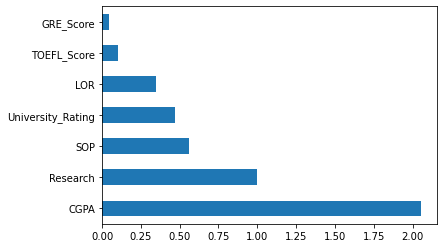

     y_act  y_pred  y_pred_prob
376      4       4     0.001390
342      4       4     0.076787
118      4       4     0.002949
310      2       2     0.559830
354      4       4     0.004854
361      1       1     0.072457
31       2       2     0.575805
398      3       3     0.280810
383      4       3     0.048037
148      1       1     0.029338


Confusion Matrix:
 [[23  5  0  0]
 [ 3 17  9  0]
 [ 0  8 10  6]
 [ 0  2 10 27]]


classification_report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        28
           2       0.53      0.59      0.56        29
           3       0.34      0.42      0.38        24
           4       0.82      0.69      0.75        39

    accuracy                           0.64       120
   macro avg       0.64      0.63      0.63       120
weighted avg       0.67      0.64      0.65       120

f1_score: 0.6526865837638856
Recall_score: 0.6416666666666667
Precision_score: 0.6696702812273932
accurac

In [1554]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']}

# Create model object
model = svm.SVC(probability=True)

# Create GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')

model_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(model_cv.best_params_))
print("Best model score: {}".format(model_cv.best_score_))

# get best model

model = model_cv.best_estimator_

# Feature importance/Coefficients

pd.Series(abs(model.coef_[0]), index=feature_set).nlargest(10).plot(kind='barh')
plt.show()

# Evaluate Model
#evaluate_model(model, X_test)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
print(test_result.sample(10))
print('\n')

cfm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cfm)
print('\n')

# Model evaluation
# Use Scikit-Learn function 
print("classification_report:\n",classification_report(y_test, y_pred))

f1_score = metrics.f1_score(y_test, y_pred, average='weighted')  
print("f1_score:",f1_score)
recall_score = metrics.recall_score(y_test, y_pred, average='weighted')  
print("Recall_score:",recall_score)
precision_score = metrics.precision_score(y_test, y_pred, average='weighted')  
print("Precision_score:",precision_score)
accuracy_score = metrics.accuracy_score(y_test, y_pred) 
print("accuracy_score:",accuracy_score)
#roc_auc_score = metrics.roc_auc_score(y_test, y_pred,multi_class='ovr',average='weighted')
#print("roc_auc_score:",roc_auc_score)

# Evaluate Model
eval_Result = {"f1_score:":f1_score,"Recall_score:":recall_score,"Precision_score:":precision_score,"accuracy_score:":accuracy_score}


# Appending Best Model info to final_models

final_models.append(eval_Result)  #evaluation metrics
final_models_name.append(model)   # Model name



## 9. Select the best model and Saving it

In [1555]:
# Display the records of the best model for eacch model type

dfN = pd.DataFrame.from_dict(final_models)
dfR=pd.DataFrame(final_models_name)
best_model_records = dfR.join(dfN)
best_model_records


,0,f1_score:,Recall_score:,Precision_score:,accuracy_score:
0,"LogisticRegression(C=0.5, multi_class='multino...",0.678918,0.675000,0.687430,0.675000
1,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.599601,0.608333,0.603505,0.608333
2,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.626678,0.616667,0.643132,0.616667
3,"SVC(C=1, gamma=1, kernel='linear', probability...",0.652687,0.641667,0.669670,0.641667


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.8s finished


{'model_name': 'lgr1',
 'model': LogisticRegression(C=0.5, multi_class='multinomial', n_jobs=3, verbose=1),
 'accuracy': 0.475,
 'precision': 0.5076907598832162,
 'f1_score': 0.48300665478820953}

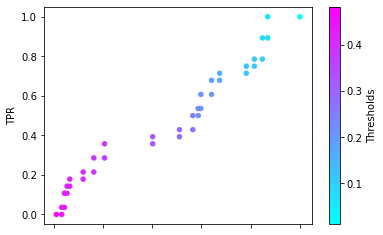

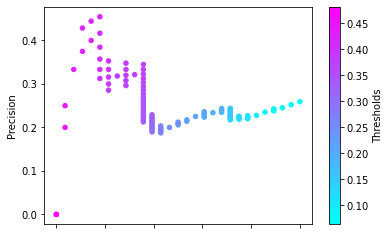

In [1556]:
#Best Model - Logistics Regression {'C': 0.5}:

model_train(LogisticRegression(C=0.5, multi_class = "multinomial",  verbose=1, n_jobs=3), 'lgr1',X_train, X_test, y_train, y_test)

## Issue with logistic regression model. It gives 1 always for class 1 probability. Issue could not be solved. Therefore the next best model was selected. It also gives 1 always for class 1 probability. I could notice, that the issue comes with Standarization. So deactivate it and apply it only for logistic regression model.

In [1557]:
# Selecting the best model from models 
model = models.query("model_name=='lgr1'")
model 

,model_name,model,accuracy,precision,f1_score
0,lgr1,"LogisticRegression(C=0.5, multi_class='multino...",0.475,0.507691,0.483007


In [1558]:
model = model['model'].values[0]
model

LogisticRegression(C=0.5, multi_class='multinomial', n_jobs=3, verbose=1)

In [1559]:
# Save as pickle file
import pickle
#save_file = 'model_lgr1_test.pickle'
save_file = 'model_lgr1_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [1560]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

LogisticRegression(C=0.5, multi_class='multinomial', n_jobs=3, verbose=1)

## 10. Predict on sample data (just to check the function)

In [1561]:
sample_input = census_data.sample(2)
sample_input

,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Priority_Admit_Range,Priority_Admit,y_act
303,304,323,107,3,3.5,3.5,8.55,1,0.73,"(0.64, 0.73]",3rd_Priority,3
388,389,296,97,2,1.5,2.0,7.80,0,0.49,"(0.339, 0.64]",4th_Priority,4


## Post_processing Function, Score Function, and Prediction Function

In [1563]:
# Score function
def score(n_data, model):
    return model.predict_proba(n_data)

# Post processing function for prediction
def post_processing(prediction, n_data):
    for i in range(len(prediction.T)):
        sample_input[ 'pred_prob_class' + str(i+1)] = prediction.T[i]
    sample_input[ 'pred_class'] = model.predict(n_data)

# Prediction function for application (Inference pipeline)
def app_prediction_function(n_data, model):
    return post_processing(score(n_data, model), n_data)

pros_Data = pre_processing(sample_input)[feature_set]

app_prediction_function(pros_Data, model)

sample_input


,ID,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Priority_Admit_Range,Priority_Admit,y_act,pred_prob_class1,pred_prob_class2,pred_prob_class3,pred_prob_class4,pred_class
303,304,323,107,3,3.5,3.5,8.55,1,0.73,"(0.64, 0.73]",3rd_Priority,3,0.056604,0.373609,0.391171,0.178616,3
388,389,296,97,2,1.5,2.0,7.80,0,0.49,"(0.339, 0.64]",4th_Priority,4,0.000524,0.037756,0.241375,0.720346,4


## Explain the Model with LIME

In [1564]:
X_train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [1565]:
test_sample_features = X_test.sample()
test_sample_features

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
70,332,118,5,5.0,5.0,9.64,1


In [1566]:
test_sample_features.values

array([[332.  , 118.  ,   5.  ,   5.  ,   5.  ,   9.64,   1.  ]],
      dtype=float32)

In [1567]:
test_sample_features.values[0]

array([332.  , 118.  ,   5.  ,   5.  ,   5.  ,   9.64,   1.  ],
      dtype=float32)

In [1568]:
test_sample_grade = y_test.loc[70]
test_sample_grade

1

In [1569]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['class 1', 'class 2', 'class 3', 'class 4'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_sample_features.values[0],
    predict_fn=model.predict_proba,top_labels=4)

lime_exp.show_in_notebook(show_table=True)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
